In [ ]:
# CLASS TASK
K-Means Clustering + PCA (Demo) using a toy dataset (randomly generated blobs) to understand how K-Means and PCA work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

In [3]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

In [4]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

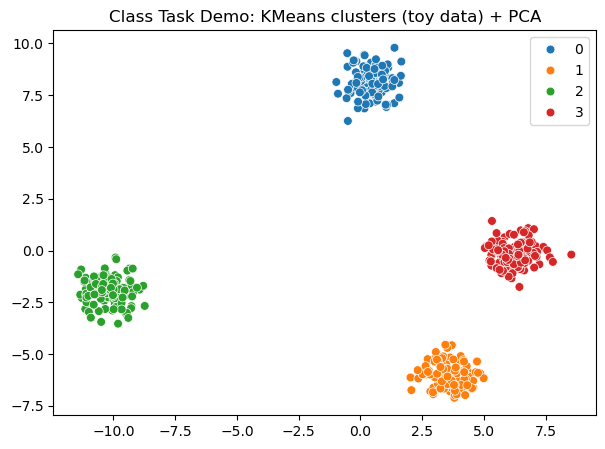

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred, palette="tab10", s=40)
plt.title("Class Task Demo: KMeans clusters (toy data) + PCA")
plt.show()

In [ ]:
# ASSIGNMENT
Apply clustering on dataset & visualize results in 2D using PCA.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [7]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')
print(" Dataset Loaded — Rows:", df.shape[0])
df.head()


 Dataset Loaded — Rows: 541909


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df = df.dropna(subset=['Quantity', 'UnitPrice', 'InvoiceDate'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] >= 0]
df.reset_index(drop=True, inplace=True)


In [9]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour


In [10]:
features = ['Quantity', 'UnitPrice', 'TotalAmount', 'Month', 'Hour']
X = df[features]


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Take only 2000 random rows for faster clustering
X_sample = X_scaled[:2000]


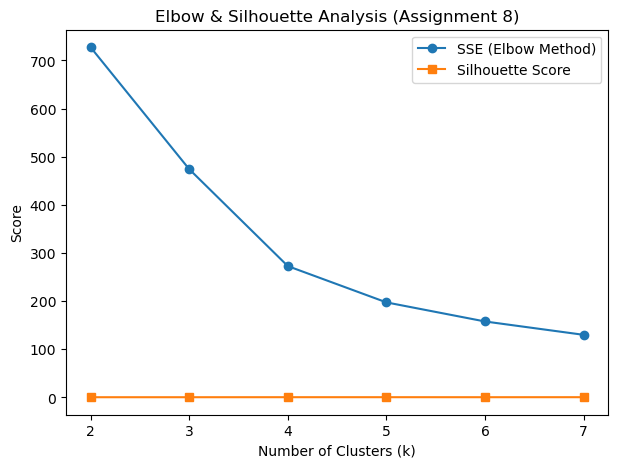

In [13]:
sse = []
sil = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    sse.append(kmeans.inertia_)
    sil.append(silhouette_score(X_sample, labels))

# Plot both curves together
plt.figure(figsize=(7,5))
plt.plot(range(2,8), sse, 'o-', label='SSE (Elbow Method)')
plt.plot(range(2,8), sil, 's-', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Elbow & Silhouette Analysis (Assignment 8)')
plt.legend()
plt.show()


In [14]:
best_k = 4  # Assume from graph
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [15]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)


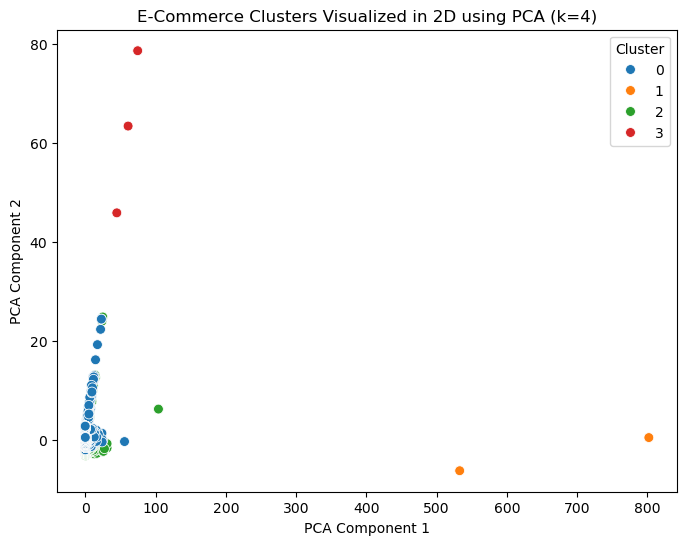

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='tab10', s=50)
plt.title(f"E-Commerce Clusters Visualized in 2D using PCA (k={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [17]:
df.to_csv("clustered_ecommerce_data.csv", index=False)
print("Clustered data saved successfully!")


Clustered data saved successfully!
